# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
import seaborn as sns

In [2]:
# Load the CSV file
df = pd.read_csv("./Stock_Data/clean_stocks.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)
df.dropna(inplace=True)  # Remove any initial NaNs
df

,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-02-07,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
2023-02-07,GOOG,103.629997,108.669998,103.547997,108.040001,108.040001,33738800
2023-02-07,MSFT,260.529999,268.769989,260.079987,267.559998,266.891510,50841400
2023-02-07,NFLX,358.510010,364.179993,354.179993,362.950012,362.950012,6289400
2023-02-08,GOOG,102.690002,103.580002,98.455002,100.000000,100.000000,73546000
...,...,...,...,...,...,...,...
2023-05-04,NFLX,319.010010,323.609985,317.950012,320.779999,320.779999,3879700
2023-05-04,GOOG,106.160004,106.300003,104.699997,105.209999,105.209999,19780600
2023-05-05,MSFT,305.720001,311.970001,304.269989,310.649994,310.649994,28181200


# Candlestick Chart

In [3]:
def candlestick_plot(df, title='Candlestick Chart'):
    """Creates a candlestick plot using matplotlib."""
    fig, ax = plt.subplots(figsize=(12, 6))

    for date, row in df.iterrows():
        open_price = row['Open']
        high_price = row['High']
        low_price = row['Low']
        close_price = row['Close']

        # Candlestick body
        if close_price >= open_price:
            color = 'green'
            body_height = close_price - open_price
            body_bottom = open_price
        else:
            color = 'red'
            body_height = open_price - close_price
            body_bottom = close_price

        ax.add_patch(plt.Rectangle((mdates.date2num(date) - 0.4, body_bottom), 0.8, body_height, facecolor=color, edgecolor='black'))

        # High-low lines (wicks)
        ax.add_line(plt.Line2D([mdates.date2num(date), mdates.date2num(date)], [low_price, high_price], color='black'))

    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

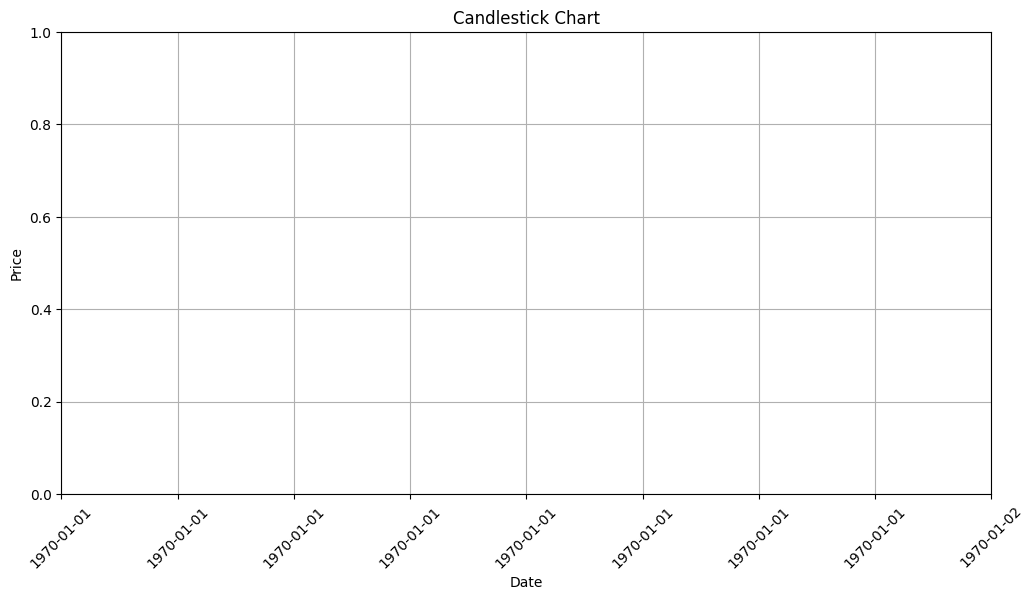

In [4]:
candlestick_plot(df) #This is where the mplfinance plot would be.

# Candlestick Chart

In [5]:
fig_candle = go.Figure(data=[go.Candlestick(x=df.index,
                                           open=df['Open'],
                                           high=df['High'],
                                           low=df['Low'],
                                           close=df['Close'])])
fig_candle.update_layout(title='Interactive Candlestick Chart', xaxis_rangeslider_visible=False)
fig_candle.show()

# Volume Profiles

In [6]:
fig_volume = go.Figure(go.Histogram(x=df['Volume'], nbinsx=100))
fig_volume.update_layout(title='Volume Profile')
fig_volume.show()

# Correlation Heatmap

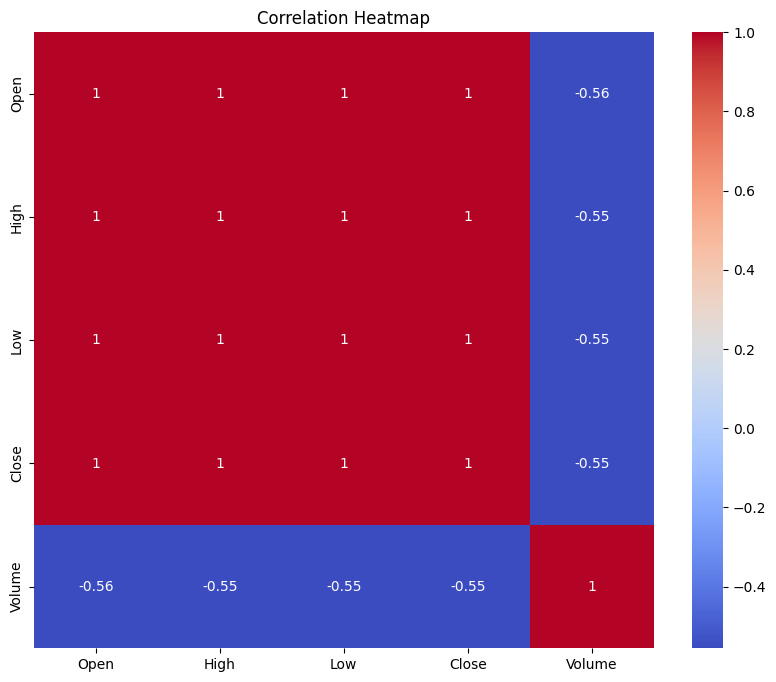

In [7]:
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution Plots

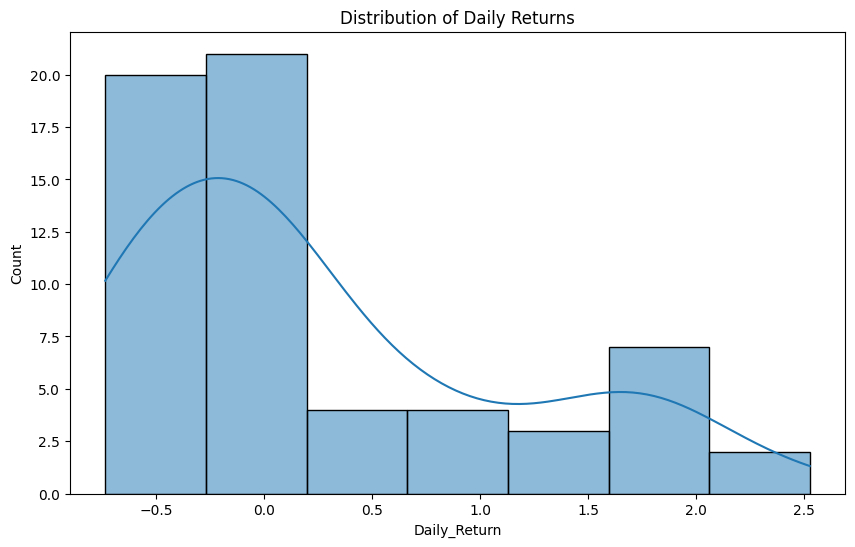

In [8]:
tmp = df
# Aggregate data to daily level
tmp = tmp.groupby('Date').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Adj Close':'last', 'Volume':'sum'})
tmp['Daily_Return'] = tmp['Close'].pct_change().dropna()  # Calculate daily returns

plt.figure(figsize=(10, 6))
sns.histplot(tmp['Daily_Return'], kde=True)
plt.title('Distribution of Daily Returns')
plt.show()

# Scatter Plot

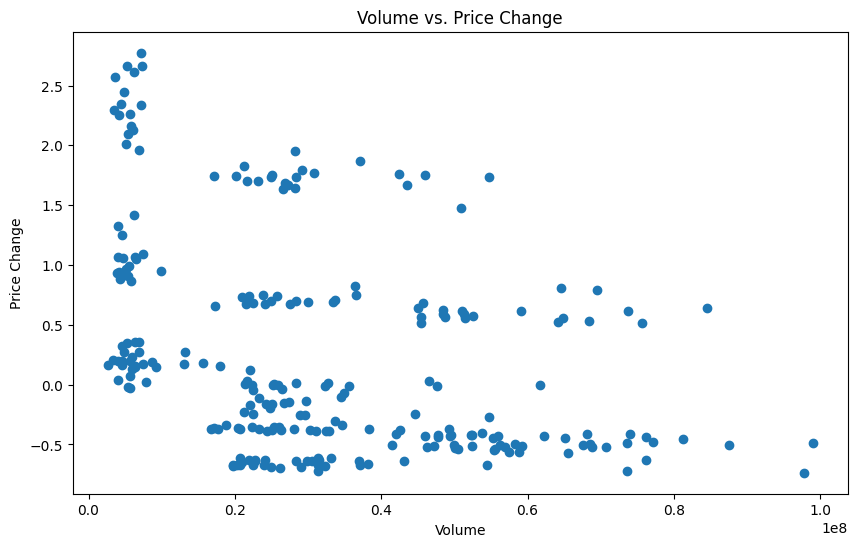

In [10]:
price_change = df['Close'].pct_change().dropna()
volume = df['Volume'][1:] #Remove the first row to match the length of price_change.

plt.figure(figsize=(10, 6))
plt.scatter(volume, price_change)
plt.title('Volume vs. Price Change')
plt.xlabel('Volume')
plt.ylabel('Price Change')
plt.show()